<a href="https://colab.research.google.com/github/leptoquark/MapStore/blob/master/data_analysis_pg_secret_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connessione al datababase e conversioni per Casting

In [3]:
!pip install psycopg2-binary

from google.colab import userdata
import psycopg2
import pandas as pd

DATE2STR = psycopg2.extensions.new_type(
    psycopg2.extensions.DATE.values,
    'DATE2STR',
    lambda value, curs:
        str(value) if value is not None else None)

psycopg2.extensions.register_type(DATE2STR)

try:
    connection = psycopg2.connect(
        host=userdata.get('host'),
        port=userdata.get('port'),
        database=userdata.get('database'),
        user=userdata.get('user'),
        password=userdata.get('password')
    )
    cursor = connection.cursor()
    print("Connessione stabilita correttamente")
except Exception as e:
    print("Errore nella connessione alla base di dati:", e)

Connessione stabilita correttamente


## Query di lettura (eventuale Limite per i test)

In [ ]:
query = "SELECT * FROM cgmanager_ai.pratiche limit 1000"

cursor.execute(query);

num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]


rows = cursor.fetchall()

df = pd.DataFrame(rows,columns=field_names)

df.head()

In [5]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

pd.set_option('display.max_columns', None)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['azienda_codice_cat'] = label_encoder.fit_transform(df['azienda_codice'])
df['committente_codice_cat'] = label_encoder.fit_transform(df['committente_codice'])
df['tp_profilo_cat'] = label_encoder.fit_transform(df['tp_profilo'])
df['tp_intervento_cat'] = label_encoder.fit_transform(df['tp_intervento'])
df['prodotto_cat'] = label_encoder.fit_transform(df['prodotto'])
df['livello_cat'] = label_encoder.fit_transform(df['livello'])
df['tipo_soggetto_cat'] = label_encoder.fit_transform(df['tipo_soggetto'])
df['sesso_cat'] = label_encoder.fit_transform(df['sesso'])
df['tipo_societa_cat'] = label_encoder.fit_transform(df['tipo_societa'])
df['profilo_esattore_cat'] = label_encoder.fit_transform(df['profilo_esattore'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   azienda_codice          1000 non-null   object        
 1   id_pratica              1000 non-null   int64         
 2   committente_codice      1000 non-null   object        
 3   tp_profilo              1000 non-null   object        
 4   tp_intervento_cod       1000 non-null   object        
 5   tp_intervento           1000 non-null   object        
 6   prodotto_cod            245 non-null    object        
 7   prodotto                245 non-null    object        
 8   livello_cod             197 non-null    object        
 9   livello                 197 non-null    object        
 10  tipo_soggetto           248 non-null    object        
 11  sesso                   187 non-null    object        
 12  tipo_societa            248 non-null    object   

In [6]:
df.describe(include='all')
from google.colab import files

df.describe(include='all').to_csv('describe.csv', encoding = 'utf-8-sig')
files.download('describe.csv')

<ipython-input-6-3feeb8da6e33>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-6-3feeb8da6e33>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').to_csv('describe.csv', encoding = 'utf-8-sig')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

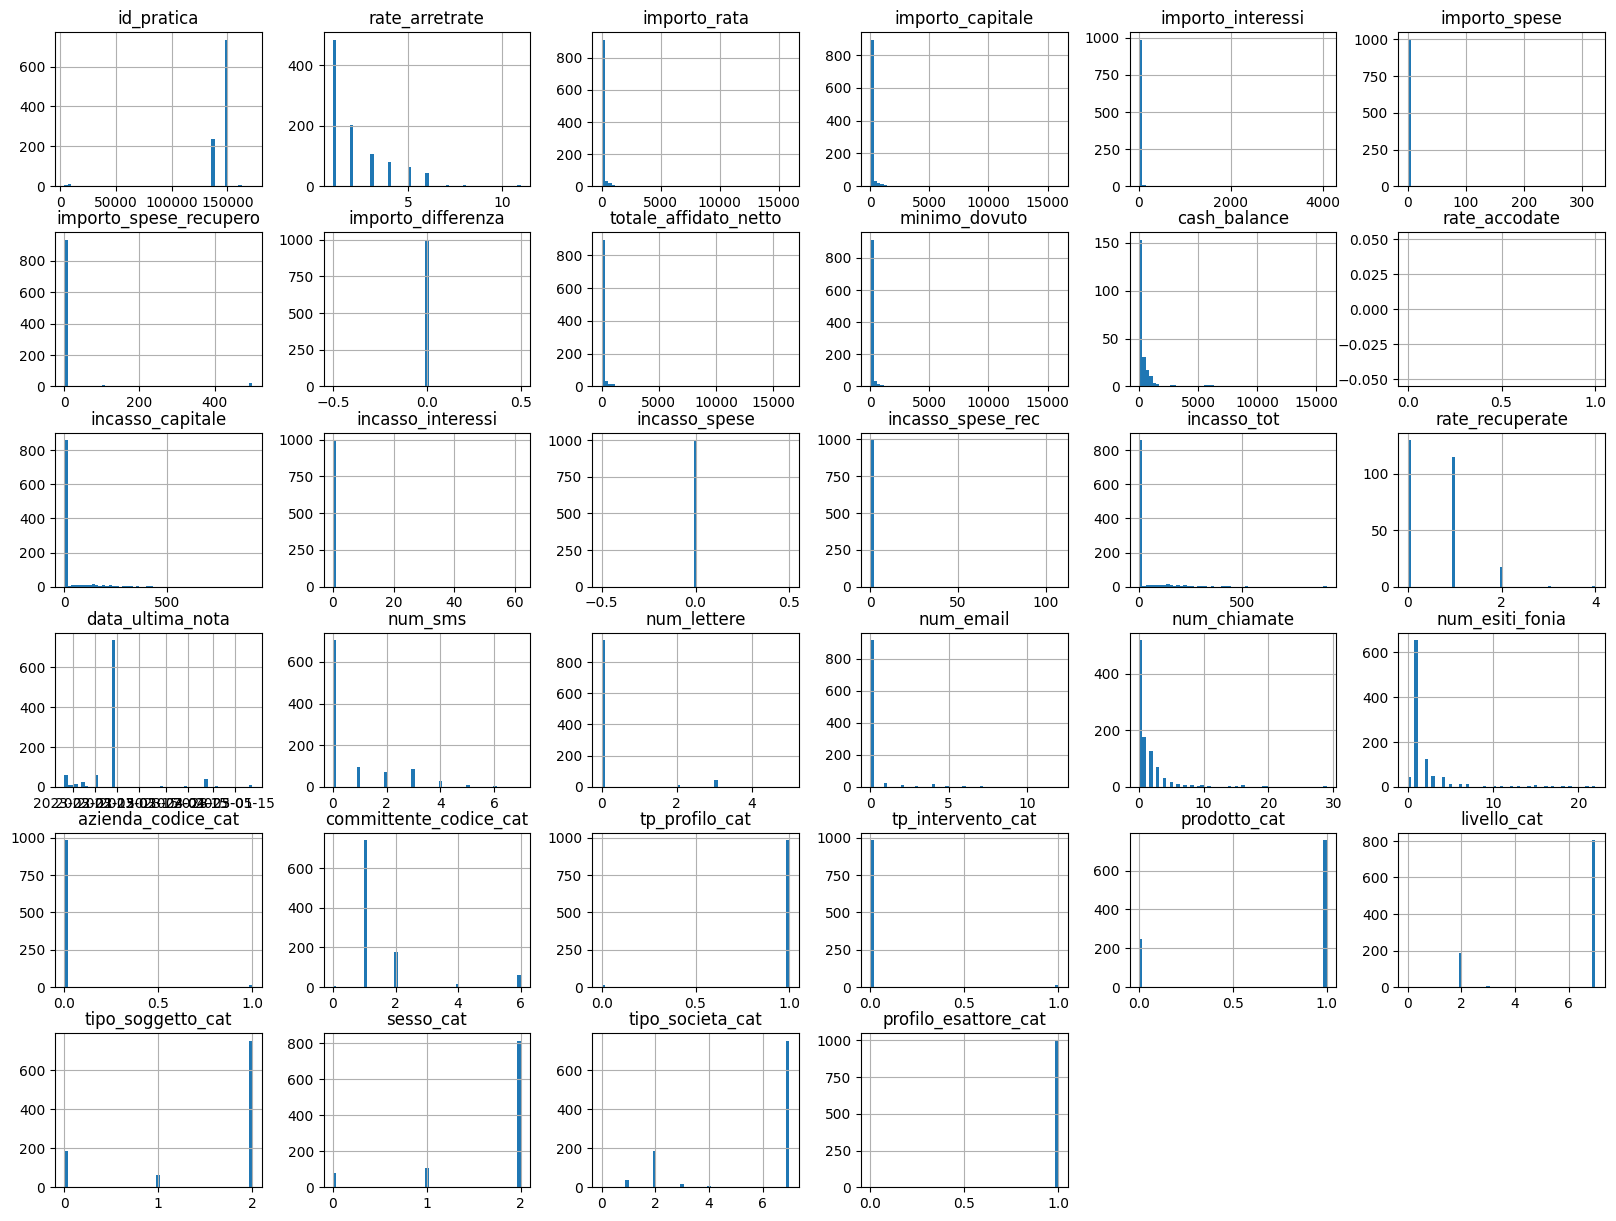

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.hist(bins=55, figsize=(20,15))
plt.show();

In [8]:
import numpy as np

aux_1=df[['incasso_tot']]
aux_2=df[['totale_affidato_netto']]
X = np.divide(aux_1,aux_2)

X[np.isnan(X)] = 0
X[np.isposinf(X)] = 0
X[np.isneginf(X)] = 0
X=np.clip(X, None, 1)

df['incasso_perc'] = X
df['incasso_perc'] = df['incasso_perc'].map(lambda n: '{:,.2%}'.format(n))
X = np.multiply(X,100)
X = np.rint(X)

<ipython-input-8-724e88aa48bc>:5: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  X = np.divide(aux_1,aux_2)


In [9]:
from sklearn.preprocessing import KBinsDiscretizer



est = KBinsDiscretizer(n_bins=10,
                       encode='ordinal',
                       strategy='kmeans',
                       subsample=None)
est.fit(X)
Xt = est.transform(X)

df['incasso_bin'] = Xt
df[['incasso_tot','totale_affidato_netto','incasso_perc','incasso_bin']]

,incasso_tot,totale_affidato_netto,incasso_perc,incasso_bin
0,100.82,100.82,100.00%,9.0
1,94.11,94.11,100.00%,9.0
2,0.00,768.48,0.00%,0.0
3,136.83,136.83,100.00%,9.0
4,177.66,177.66,100.00%,9.0
...,...,...,...,...
995,0.00,0.00,0.00%,0.0
996,0.00,0.00,0.00%,0.0
997,0.00,884.91,0.00%,0.0
998,0.00,0.00,0.00%,0.0


(1000, 19)
[9.03003954e-02 9.40053831e-02 1.70932114e-02 2.25022122e-06
 1.93739541e-02 0.00000000e+00 1.00515988e-01 8.87208712e-02
 2.71158829e-02 1.31231444e-03 1.45025529e-02 3.70960992e-04
 2.18141934e-04 1.05628964e-01 1.05970973e-01 1.22676521e-01
 1.32802887e-01 7.50982963e-02 4.29045073e-03]


Text(0.5, 1.0, 'Selezione delle caratteristiche numeriche più importanti')

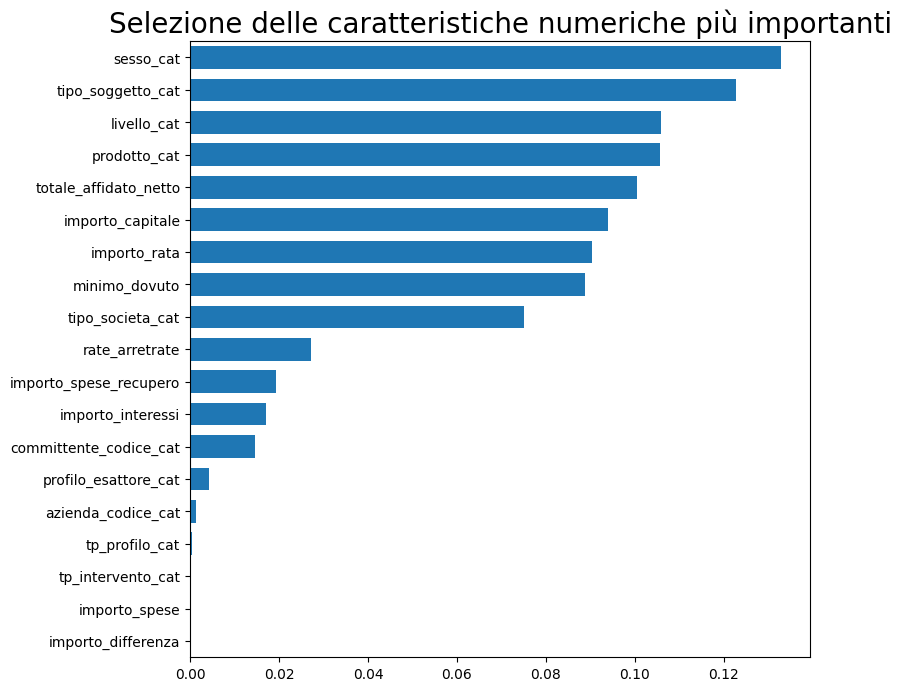

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

X,y=df[[
        'importo_rata',
        'importo_capitale',
        'importo_interessi',
        'importo_spese',
        'importo_spese_recupero',
        'importo_differenza',
        'totale_affidato_netto',
        'minimo_dovuto',
        'rate_arretrate',
        'azienda_codice_cat',
        'committente_codice_cat',
        'tp_profilo_cat',
        'tp_intervento_cat',
        'prodotto_cat',
        'livello_cat',
        'tipo_soggetto_cat',
        'sesso_cat',
        'tipo_societa_cat',
        'profilo_esattore_cat',
        ]],df.incasso_bin
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X,y)
print(clf.feature_importances_)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0,len(clf.feature_importances_))+0.5
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height = 0.7)
ax1.set_yticks(tree_indices)

ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])

ax1.set_ylim((0,len(clf.feature_importances_)))
ax1.set_title("Selezione delle caratteristiche numeriche più importanti", fontsize=20)

In [11]:
df.incasso_bin.value_counts()

0.0    859
9.0    126
3.0      3
1.0      3
2.0      2
8.0      2
4.0      2
6.0      1
5.0      1
7.0      1
Name: incasso_bin, dtype: int64

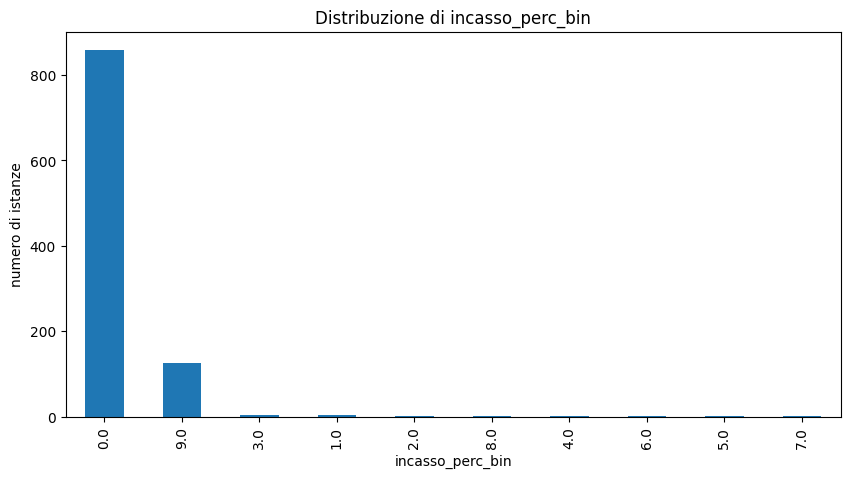

In [12]:
df.incasso_bin.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribuzione di incasso_perc_bin")
plt.ylabel('numero di istanze')
plt.xlabel('incasso_perc_bin');

In [13]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

plt.figure(figsize=(10,5))
c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
c



<ipython-input-13-b3b86014f00b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,id_pratica,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,abilitato_sms,presenza_foto,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,incasso_bin
id_pratica,1.000000,-0.034640,-0.243915,-0.267369,-0.368372,-0.236316,-0.127500,NaN,-0.297494,-0.243915,-0.038375,NaN,-0.187798,-0.015768,NaN,-0.019556,-0.184019,0.197986,0.467019,-0.014595,-0.137050,-0.074263,-0.076082,-0.060184,-0.052997,-0.960145,-0.426422,0.960145,-0.960145,0.174760,0.287461,0.159459,0.135287,0.159561,0.236317,-0.127494
rate_arretrate,-0.034640,1.000000,-0.078542,-0.037328,-0.037629,-0.023595,-0.024943,NaN,-0.040078,-0.078542,0.313918,NaN,-0.148869,-0.035757,NaN,-0.044450,-0.147937,-0.131740,-0.044103,-0.020095,-0.232678,-0.101948,-0.097854,-0.093067,-0.114051,0.108619,-0.148716,-0.108619,0.108619,0.310239,0.251311,0.307573,0.264171,0.307985,-0.089120,-0.253248
importo_rata,-0.243915,-0.078542,1.000000,0.922995,0.413643,0.394477,0.638182,NaN,0.923598,1.000000,0.915099,NaN,0.128938,0.020879,NaN,0.023246,0.127097,-0.258992,-0.111306,0.017618,0.308148,0.504869,0.475791,0.468182,0.464190,0.176250,0.511083,-0.176250,0.176250,-0.263569,0.000576,-0.140660,0.002221,-0.245852,-0.008675,-0.005842
importo_capitale,-0.267369,-0.037328,0.922995,1.000000,0.339123,0.291371,0.823842,NaN,0.993037,0.922995,1.000000,NaN,0.145273,0.011996,NaN,0.012896,0.142230,-0.315126,-0.136713,0.015668,0.367844,0.592801,0.549586,0.550926,0.566770,0.189715,0.608435,-0.189715,0.189715,-0.305687,0.006072,-0.155556,0.019477,-0.284513,-0.068946,-0.025136
importo_interessi,-0.368372,-0.037629,0.413643,0.339123,1.000000,0.730469,0.063599,NaN,0.444226,0.413643,0.575621,NaN,0.112389,0.009187,NaN,0.006787,0.109869,-0.113162,-0.192183,0.005385,0.016430,0.057842,0.047859,0.031470,0.034013,0.366901,0.160598,-0.366901,0.366901,-0.004307,0.031163,0.014174,0.028647,-0.001480,0.001207,-0.022728
importo_spese,-0.236316,-0.023595,0.394477,0.291371,0.730469,1.000000,-0.006688,NaN,0.364223,0.394477,NaN,NaN,0.137568,-0.001517,NaN,-0.001886,0.133643,-0.055012,-0.125229,-0.001416,-0.017501,-0.007829,-0.007770,-0.015088,-0.021014,0.240586,0.062322,-0.240586,0.240586,0.018023,0.015542,0.017472,0.014164,0.017958,0.001001,-0.012507
importo_spese_recupero,-0.127500,-0.024943,0.638182,0.823842,0.063599,-0.006688,1.000000,NaN,0.806591,0.638182,0.856731,NaN,0.082395,0.040764,NaN,0.046037,0.083501,-0.360400,-0.095069,0.048333,0.427797,0.791278,0.717577,0.690194,0.745813,0.037396,0.740070,-0.037396,0.037396,-0.351473,0.089082,-0.139640,0.089513,-0.329058,0.004065,-0.057601
importo_differenza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totale_affidato_netto,-0.297494,-0.040078,0.923598,0.993037,0.444226,0.364223,0.806591,NaN,1.000000,0.923598,0.999247,NaN,0.151050,0.014309,NaN,0.015106,0.148019,-0.320144,-0.154358,0.017551,0.357406,0.586043,0.541650,0.539102,0.556825,0.222320,0.611063,-0.222320,0.222320,-0.295540,0.014732,-0.145956,0.026478,-0.274842,-0.061625,-0.028959
minimo_dovuto,-0.243915,-0.078542,1.000000,0.922995,0.413643,0.394477,0.638182,NaN,0.923598,1.000000,0.915099,NaN,0.128938,0.020879,NaN,0.023246,0.127097,-0.258993,-0.111306,0.017618,0.308148,0.504869,0.475791,0.468182,0.464190,0.176251,0.511083,-0.176251,0.176251,-0.263569,0.000576,-0.140660,0.002221,-0.245852,-0.008675,-0.005842


<Figure size 1000x500 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='importo_rata', ylabel='importo_rata'>,
        <Axes: xlabel='incasso_capitale', ylabel='importo_rata'>,
        <Axes: xlabel='incasso_interessi', ylabel='importo_rata'>,
        <Axes: xlabel='incasso_spese', ylabel='importo_rata'>],
       [<Axes: xlabel='importo_rata', ylabel='incasso_capitale'>,
        <Axes: xlabel='incasso_capitale', ylabel='incasso_capitale'>,
        <Axes: xlabel='incasso_interessi', ylabel='incasso_capitale'>,
        <Axes: xlabel='incasso_spese', ylabel='incasso_capitale'>],
       [<Axes: xlabel='importo_rata', ylabel='incasso_interessi'>,
        <Axes: xlabel='incasso_capitale', ylabel='incasso_interessi'>,
        <Axes: xlabel='incasso_interessi', ylabel='incasso_interessi'>,
        <Axes: xlabel='incasso_spese', ylabel='incasso_interessi'>],
       [<Axes: xlabel='importo_rata', ylabel='incasso_spese'>,
        <Axes: xlabel='incasso_capitale', ylabel='incasso_spese'>,
        <Axes: xlabel='incasso_interessi', ylabel='incass

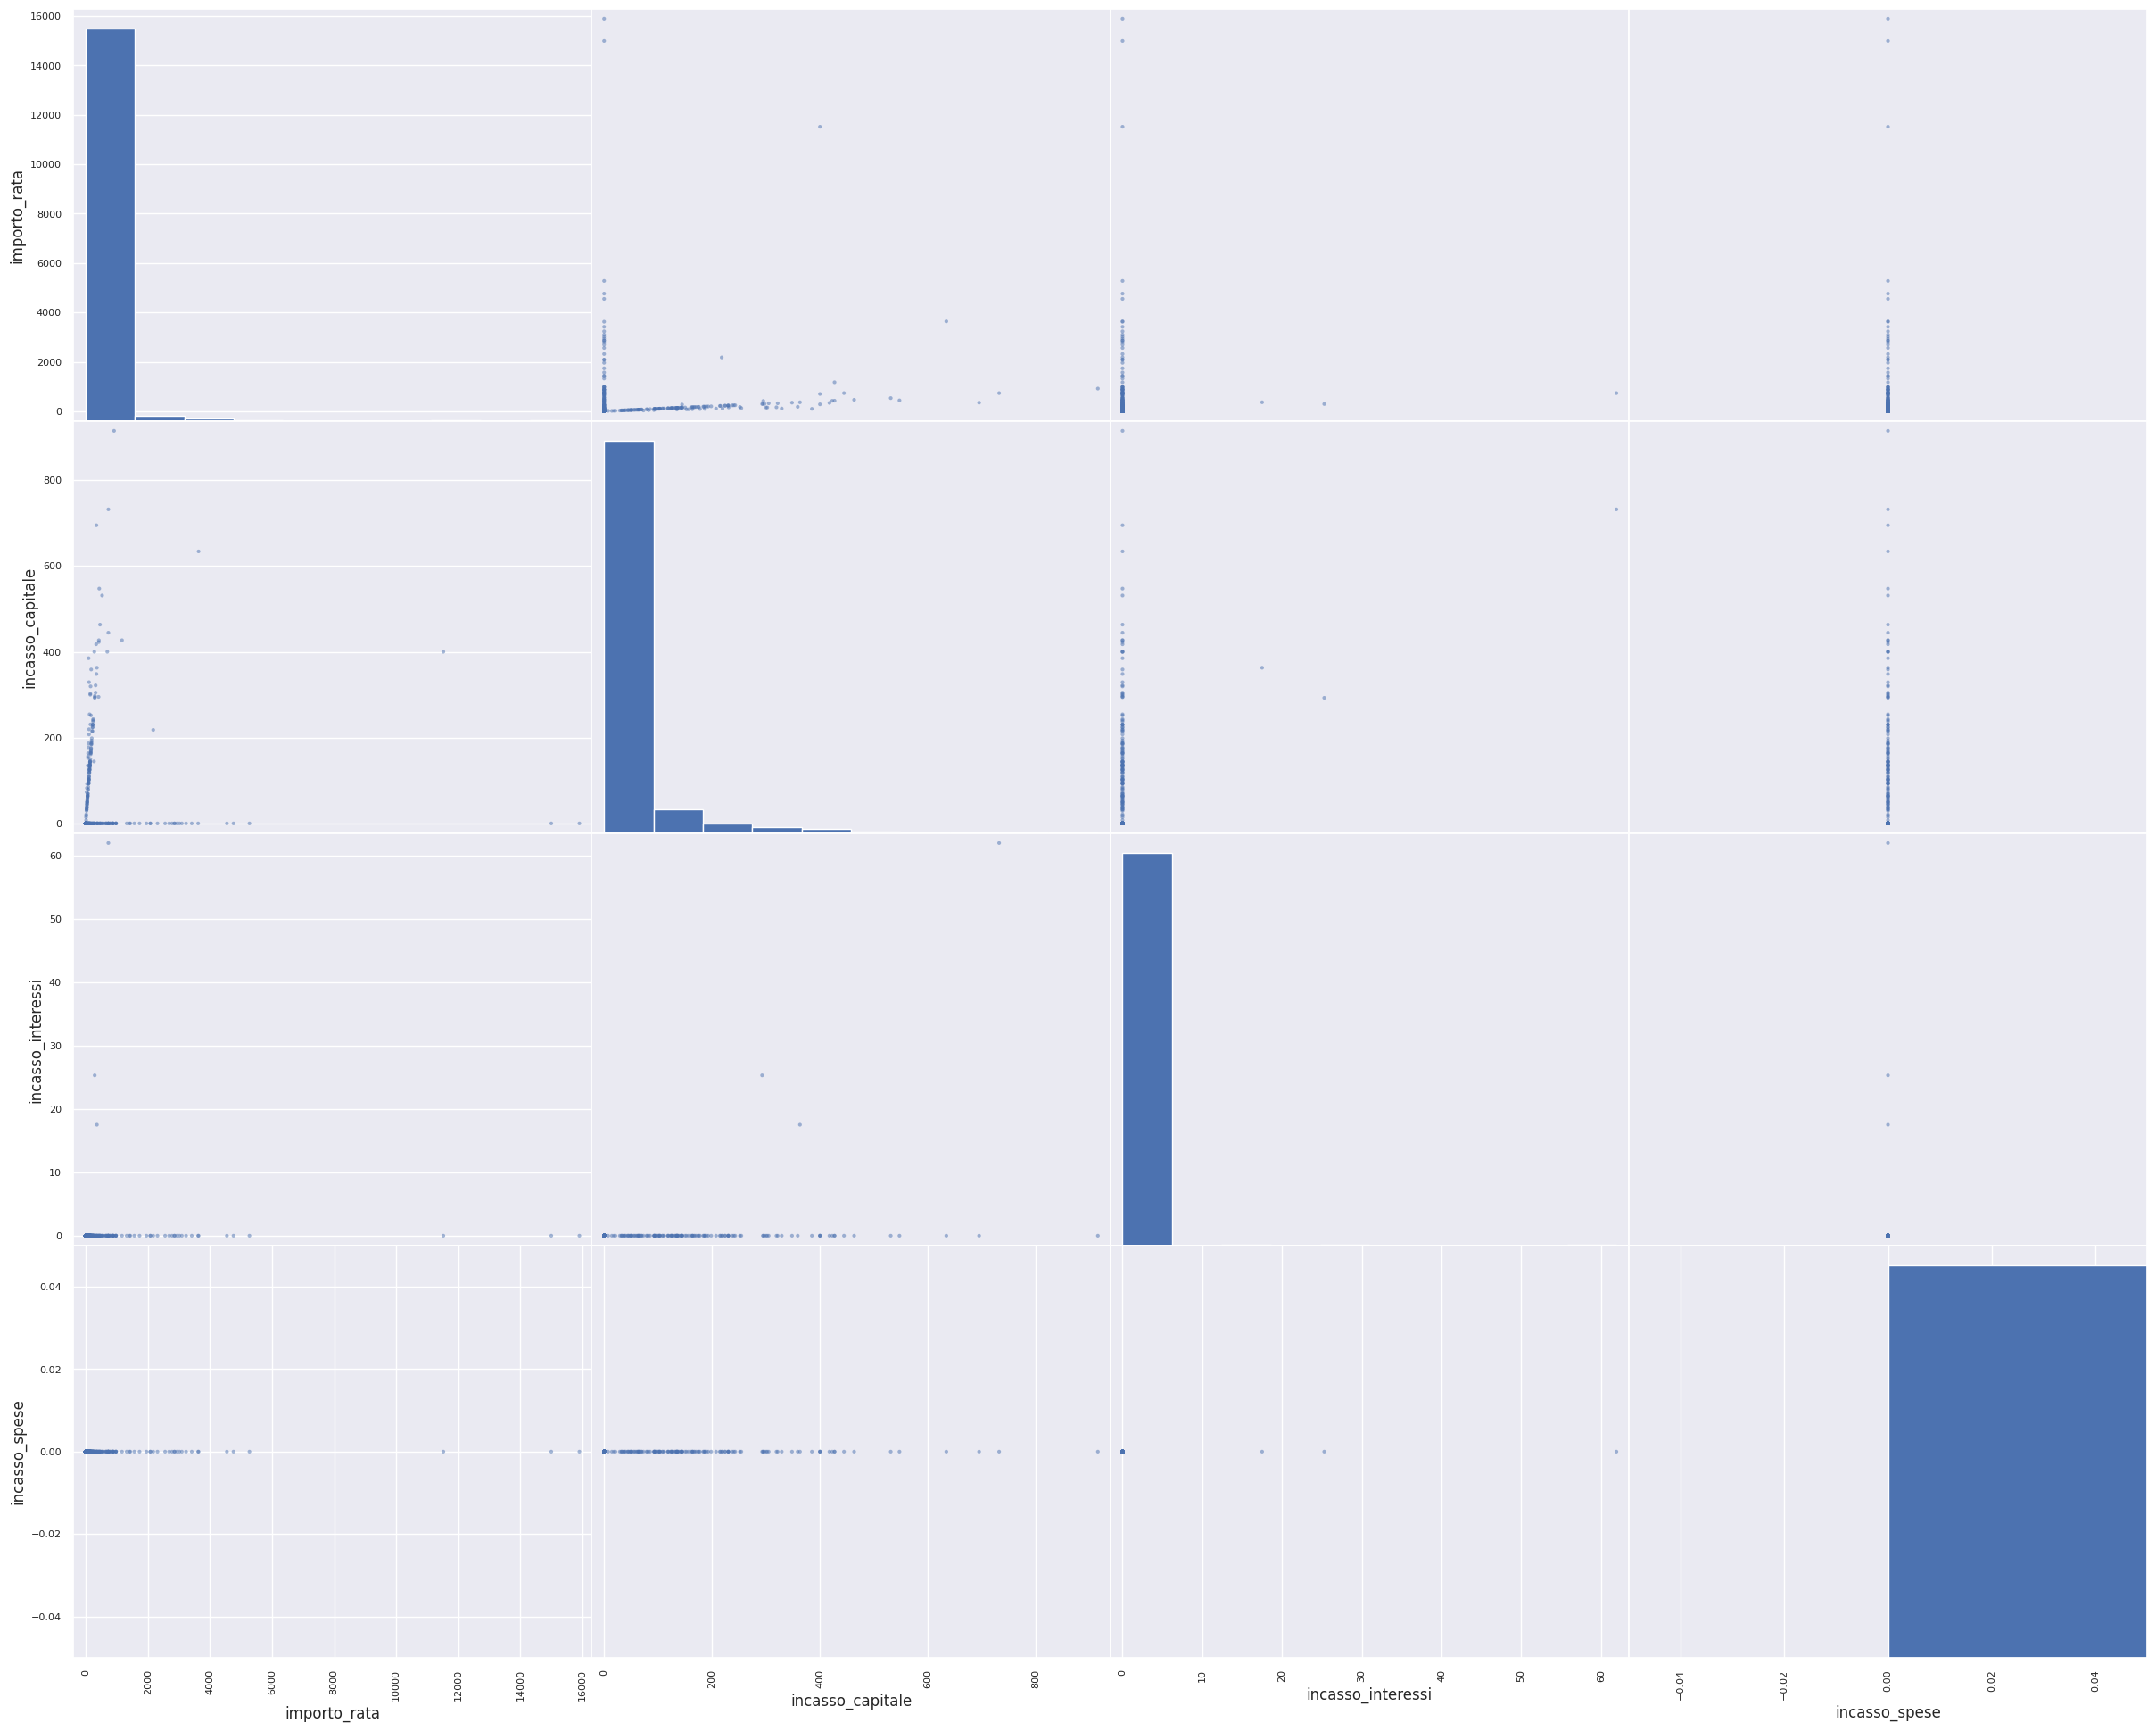

In [14]:
attributes = df.columns;

from pandas.plotting import scatter_matrix
attributes = ['importo_rata', 'incasso_capitale', 'incasso_interessi', 'incasso_spese'];
scatter_matrix(df[attributes], figsize = (30,24))

In [15]:
mask = df['incasso_tot'] == 0.0

df_noval = df[~mask]
df_drop = df_noval.drop(columns=['incasso_tot','incasso_bin','totale_affidato_netto'])
df_drop.describe()

,id_pratica,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,rate_recuperate,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,140.000000,0.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,135151.979021,1.265734,287.284825,397.524895,33.133217,2.258671,12.925804,0.0,287.284566,292.916071,NaN,183.975664,0.732308,0.0,1.895105,1.090909,1.986014,0.195804,0.615385,2.258741,2.664336,0.020979,2.370629,0.979021,0.020979,0.020979,2.503497,0.125874,0.748252,2.118881,0.993007
std,19788.471722,0.731110,1016.728174,1349.670731,342.880661,27.009781,55.890678,0.0,1016.728315,952.566376,NaN,151.013792,5.755874,0.0,11.936539,0.516067,1.138234,0.663524,1.787764,2.585750,3.299475,0.143818,1.178913,0.143818,0.143818,0.143818,1.486437,0.391227,0.633218,0.834886,0.083624
min,3658.000000,1.000000,14.400000,14.400000,0.000000,0.000000,0.000000,0.0,14.400000,14.400000,NaN,7.430000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,137034.500000,1.000000,73.110000,88.150000,0.000000,0.000000,0.000000,0.0,73.107500,84.602500,NaN,83.915000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000
50%,137141.000000,1.000000,127.150000,136.830000,0.000000,0.000000,0.000000,0.0,127.150000,136.120000,NaN,139.200000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000
75%,137218.500000,1.000000,195.755000,230.400000,0.000000,0.000000,0.000000,0.0,195.755000,225.520000,NaN,230.400000,0.000000,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000
max,162426.000000,7.000000,11516.560000,11516.560000,4091.450000,322.990000,500.000000,0.0,11516.560000,10908.610000,NaN,915.000000,61.930000,0.0,107.160000,4.000000,5.000000,3.000000,12.000000,20.000000,19.000000,1.000000,6.000000,1.000000,1.000000,1.000000,7.000000,2.000000,2.000000,7.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split

Xm = pd.get_dummies(df_drop)
ym = df_noval.incasso_bin

X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size=0.3,
                                                    shuffle=True)

!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf_c = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

models, predictions = clf_c.fit(X_train, X_test, y_train, y_test)

 90%|████████▉ | 26/29 [00:05<00:00,  5.98it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 16
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -3.912023
[LightGBM] [Info] Start training from score -3.912023
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -0.083382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

100%|██████████| 29/29 [00:06<00:00,  4.63it/s]


In [20]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.81,0.25,None,0.75,0.14
DecisionTreeClassifier,0.81,0.25,None,0.79,0.10
ExtraTreeClassifier,0.81,0.25,None,0.81,0.12
Perceptron,0.81,0.25,None,0.77,0.21
BaggingClassifier,0.81,0.25,None,0.80,0.11
AdaBoostClassifier,0.79,0.12,None,0.75,0.89
LogisticRegression,0.79,0.12,None,0.71,0.45
SVC,0.79,0.12,None,0.70,0.10
RidgeClassifierCV,0.79,0.12,None,0.73,0.16


In [21]:
clf.feature_names_in_

array(['importo_rata', 'importo_capitale', 'importo_interessi',
       'importo_spese', 'importo_spese_recupero', 'importo_differenza',
       'totale_affidato_netto', 'minimo_dovuto', 'rate_arretrate',
       'azienda_codice_cat', 'committente_codice_cat', 'tp_profilo_cat',
       'tp_intervento_cat', 'prodotto_cat', 'livello_cat',
       'tipo_soggetto_cat', 'sesso_cat', 'tipo_societa_cat',
       'profilo_esattore_cat'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split

df_select = df[['importo_rata',
                'importo_capitale',
                'importo_interessi',
                'importo_spese',
                'importo_spese_recupero',
                'importo_differenza',
                'minimo_dovuto',
                'rate_arretrate',
                'azienda_codice_cat',
                'committente_codice_cat',
                'tp_profilo_cat',
                'tp_intervento_cat',
                'prodotto_cat',
                'livello_cat',
                'tipo_soggetto_cat',
                'sesso_cat',
                'tipo_societa_cat',
                'profilo_esattore_cat',
                'incasso_bin','incasso_tot']]

mask =  df['incasso_bin'] == 0
df_noval = df_select[~mask]

train_set, test_set = train_test_split(df_noval,test_size=0.2,random_state=42)

training_data_01 = train_set.drop("incasso_bin",axis=1)
training_data_01  = training_data_01.drop("incasso_tot",axis=1)
training_data_01 = training_data_01.values
training_label_01 = train_set["incasso_bin"].copy()

test_data_01  = test_set.drop("incasso_bin",axis=1)
test_data_01  = test_data_01.drop("incasso_tot",axis=1)
test_data_01  = test_data_01.values
test_label_01 = test_set["incasso_bin"].copy()

|--- feature_1 <= 534.48
|   |--- feature_1 <= 18.73
|   |   |--- feature_6 <= 15.41
|   |   |   |--- class: 9.0
|   |   |--- feature_6 >  15.41
|   |   |   |--- class: 3.0
|   |--- feature_1 >  18.73
|   |   |--- feature_16 <= 3.00
|   |   |   |--- feature_1 <= 306.55
|   |   |   |   |--- class: 9.0
|   |   |   |--- feature_1 >  306.55
|   |   |   |   |--- feature_1 <= 315.08
|   |   |   |   |   |--- class: 6.0
|   |   |   |   |--- feature_1 >  315.08
|   |   |   |   |   |--- class: 9.0
|   |   |--- feature_16 >  3.00
|   |   |   |--- feature_1 <= 445.15
|   |   |   |   |--- class: 8.0
|   |   |   |--- feature_1 >  445.15
|   |   |   |   |--- class: 9.0
|--- feature_1 >  534.48
|   |--- feature_1 <= 1628.74
|   |   |--- feature_16 <= 4.00
|   |   |   |--- feature_6 <= 294.57
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_6 >  294.57
|   |   |   |   |--- feature_13 <= 4.50
|   |   |   |   |   |--- feature_0 <= 343.04
|   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |  

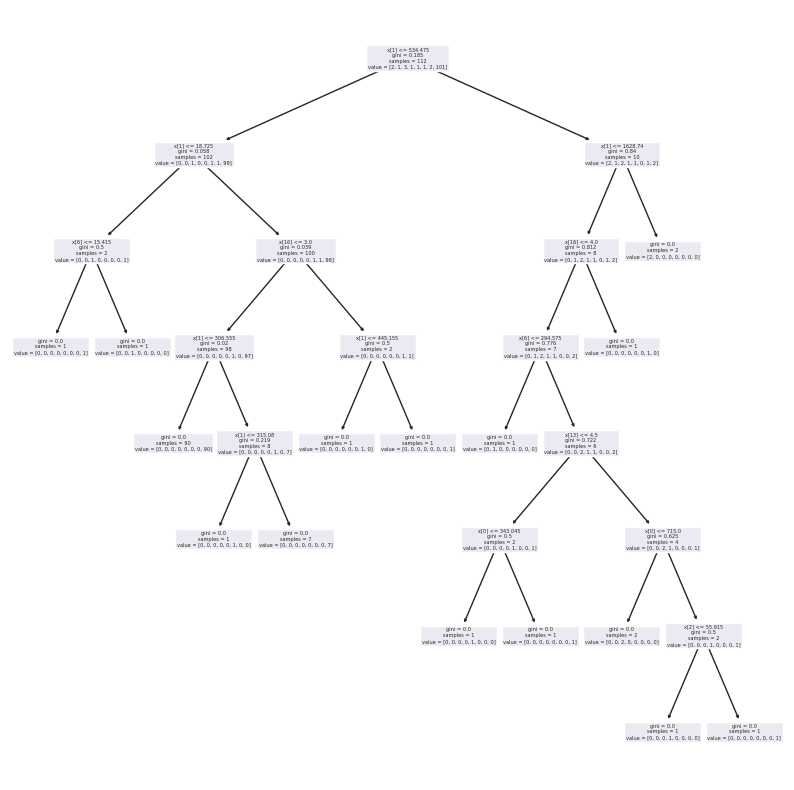

In [23]:
from sklearn import tree

tree_clf_01 = tree.DecisionTreeClassifier()
tree_clf_01 = tree_clf_01.fit(training_data_01, training_label_01)

text_representation = tree.export_text(tree_clf_01)
print(text_representation)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(tree_clf_01)


In [24]:
from sklearn.neural_network import MLPClassifier
NN_clf_01 = MLPClassifier(solver='sgd',
                          hidden_layer_sizes=(5, 2),
                          random_state=1,
                          learning_rate_init=0.001,
                          max_iter=99999)
NN_clf_01 = NN_clf_01.fit(training_data_01, training_label_01)

In [25]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs'],
              'max_iter': [100,500,1000],
              'alpha': 10.0 ** -np.arange(1, 5),
              'hidden_layer_sizes':np.arange(5, 10),
              'random_state':[0,1]}

NN_clf_grid = GridSearchCV(MLPClassifier(),
                           parameters,
                           n_jobs=1,
                           scoring='accuracy',
                           verbose=10)

NN_clf_grid.fit(training_data_01, training_label_01)
NN_clf = NN_clf_grid.best_estimator_
NN_clf = NN_clf.fit(training_data_01, training_label_01)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs
[CV 1/5; 1/120] END alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs;, score=0.957 total time=   0.1s
[CV 2/5; 1/120] START alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs
[CV 2/5; 1/120] END alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs;, score=0.826 total time=   0.1s
[CV 3/5; 1/120] START alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs
[CV 3/5; 1/120] END alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs;, score=0.864 total time=   0.1s
[CV 4/5; 1/120] START alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs
[CV 4/5; 1/120] END alpha=0.1, hidden_layer_sizes=5, max_iter=100, random_state=0, solver=lbfgs;, score=0.818 total time=   0.1s
[CV 5/5; 1/120] START alpha=0

In [26]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

svm_clf_01 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42,max_iter=999999))
    ])

svm_clf_01 = svm_clf_01.fit(training_data_01, training_label_01)

In [27]:
from sklearn.ensemble import VotingClassifier

voting_clf_01 = VotingClassifier(
    estimators=[('lr', tree_clf_01), ('rf', NN_clf), ('svc', svm_clf_01)],
    voting='hard')

voting_clf_01 = voting_clf_01.fit(training_data_01, training_label_01)

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

print(cross_val_score(voting_clf_01,test_data_01,test_label_01,cv=3, scoring="accuracy"))

y_train_pred_voting=cross_val_predict(voting_clf_01,test_data_01,test_label_01,cv=3)
conf_mx_tree = confusion_matrix(test_label_01,y_train_pred_voting)
print(conf_mx_tree)

[0.9        0.7        0.88888889]
[[ 0  0  0  0  1]
 [ 0  0  0  1  0]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  1 24]]
